In [165]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import re

In [166]:
album_data = pd.read_csv('album_data.csv')

In [167]:
album_data.head()

,Unnamed: 0,artist_id,album_name,album_release_date,album_release_type,album_genre
0,10265982,136,Madman Across the Water,11/5/1971,Album,"[{'music_genre': {'music_genre_id': 14, 'music..."
1,10266030,356,Van Halen,2/7/1978,Album,"[{'music_genre': {'music_genre_id': 14, 'music..."
2,10266032,380,Reggatta de Blanc,1985,Album,[]
3,10266038,117,A Saucerful of Secrets,1994,Album,[]
4,10266039,160,Revolver,1987,Album,[]


In [168]:
album_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33327 entries, 0 to 33326
Data columns (total 6 columns):
Unnamed: 0            33327 non-null int64
artist_id             33327 non-null int64
album_name            33327 non-null object
album_release_date    30547 non-null object
album_release_type    33327 non-null object
album_genre           33327 non-null object
dtypes: int64(2), object(4)
memory usage: 1.0+ MB


In [169]:
album_data.describe()

,Unnamed: 0,artist_id
count,3.332700e+04,3.332700e+04
mean,1.519389e+07,3.556835e+06
std,4.212377e+06,1.005765e+07
min,1.026598e+07,1.300000e+01
25%,1.099408e+07,1.340000e+02
50%,1.421764e+07,4.520000e+02
75%,1.722835e+07,6.882000e+03
max,2.897458e+07,3.544855e+07


In [170]:
album_data.columns

Index(['Unnamed: 0', 'artist_id', 'album_name', 'album_release_date',
       'album_release_type', 'album_genre'],
      dtype='object')

In [171]:
album_data.rename(columns={'Unnamed: 0':'album_id'}, inplace=True)
album_data.drop('album_genre', axis=1, inplace=True)

In [172]:
sns.set_style('whitegrid')

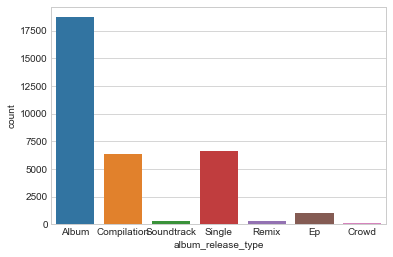

In [173]:
sns.countplot(x='album_release_type', data=album_data)

In [174]:
album_data = album_data[album_data.album_release_type != 'Compilation']
album_data = album_data[album_data.album_release_type != 'Single']
album_data = album_data[album_data.album_release_type != 'Ep']

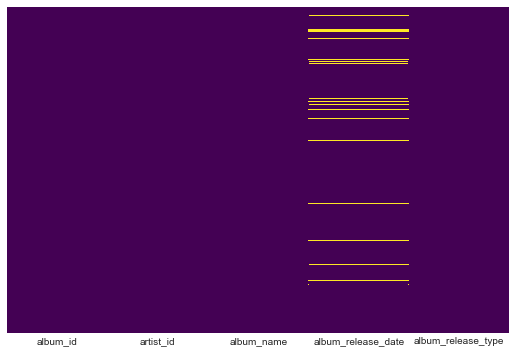

In [175]:
plt.figure(figsize=(9,6))
sns.heatmap(album_data.isnull(), yticklabels=False, cbar=False, cmap='viridis')

In [176]:
album_data.dropna(inplace=True)

In [177]:
album_data['album_name'] = album_data['album_name'].str.lower()
album_data

,album_id,artist_id,album_name,album_release_date,album_release_type
0,10265982,136,madman across the water,11/5/1971,Album
1,10266030,356,van halen,2/7/1978,Album
2,10266032,380,reggatta de blanc,1985,Album
3,10266038,117,a saucerful of secrets,1994,Album
4,10266039,160,revolver,1987,Album
5,10266040,121,pop,3/3/1997,Album
6,10266041,121,war,2/28/1983,Album
7,10266042,356,for unlawful carnal knowledge,1/1/1970,Album
8,10266085,6882,dead letter office,10/12/1994,Album
11,10266112,117,the final cut,1997,Album


In [178]:
album_data.duplicated('album_name')

0        False
1        False
2        False
3        False
4        False
5        False
6        False
7        False
8        False
11       False
12       False
15       False
16       False
17       False
18       False
19       False
20       False
21       False
22       False
23       False
24       False
25       False
26       False
30       False
31       False
34       False
36       False
37       False
38       False
39       False
         ...  
33253     True
33256    False
33258     True
33259    False
33262     True
33264    False
33267    False
33268     True
33269     True
33271    False
33272     True
33273     True
33274     True
33279    False
33280    False
33281    False
33282     True
33286     True
33287    False
33288    False
33289     True
33291     True
33292    False
33293     True
33301     True
33302     True
33304     True
33318    False
33319    False
33326     True
Length: 18282, dtype: bool

In [179]:
album_data.drop_duplicates(['album_name'], keep='first', inplace=True)

In [180]:
album_data = album_data[album_data['album_name'].str.contains('Remastered', flags=re.IGNORECASE, regex=True) != True]
album_data = album_data[album_data['album_name'].str.contains('Remaster', flags=re.IGNORECASE, regex=True) != True]

In [181]:
album_data = album_data[album_data['album_name'].str.contains('Live', flags=re.IGNORECASE, regex=True) != True]

In [182]:
album_data = album_data[album_data['album_name'].str.contains('The Best', flags=re.IGNORECASE, regex=True) != True]

In [191]:
album_data = album_data[album_data['album_name'].str.contains('Hits', flags=re.IGNORECASE, regex=True) != True]
album_data = album_data[album_data['album_name'].str.contains('Greatest', flags=re.IGNORECASE, regex=True) != True]
album_data = album_data[album_data['album_name'].str.contains('collection', flags=re.IGNORECASE, regex=True) != True]

In [192]:
album_data

,album_id,artist_id,album_name,album_release_date,album_release_type
0,10265982,136,madman across the water,11/5/1971,Album
1,10266030,356,van halen,2/7/1978,Album
2,10266032,380,reggatta de blanc,1985,Album
3,10266038,117,a saucerful of secrets,1994,Album
4,10266039,160,revolver,1987,Album
5,10266040,121,pop,3/3/1997,Album
6,10266041,121,war,2/28/1983,Album
7,10266042,356,for unlawful carnal knowledge,1/1/1970,Album
8,10266085,6882,dead letter office,10/12/1994,Album
11,10266112,117,the final cut,1997,Album


In [193]:
album_data.groupby('artist_id').count()             

,album_id,album_name,album_release_date,album_release_type
artist_id,,,,
13,115,115,115,115
22,102,102,102,102
43,32,32,32,32
60,29,29,29,29
61,93,93,93,93
64,51,51,51,51
69,191,191,191,191
72,69,69,69,69
79,27,27,27,27


In [194]:
album_data = album_data[album_data['album_name'].str.contains('Essential', flags=re.IGNORECASE, regex=True) != True]

In [196]:
album_data.to_csv('Artist_data_cleaned.csv')